Inspiré du TP Université Claude Bernard – Lyon1 Licence Sciences et Technologies – L3
Algorithmique, Programmation et Complexité – LIFAP6

# Codage de Huffman
Le codage de Huffman est un procédé très utilisé en compression de données. Il sert à encoder un texte en
binaire, en utilisant pour chaque lettre un nombre de bits dépendant du nombre de fois où la lettre est présente :

Plus la lettre apparaît, plus le nombre de bits est petit. Ainsi, le nombre total de bits utilisés pour encoder le texte est réduit par rapport à un codage ASCII standard qui utilise huit bits pour chaque lettre.

# Arbres binaires

Le code binaire associé à chaque lettre est défini par un arbre binaire. 
   + Les feuilles de l’arbre correspondent aux lettres de l’alphabet. 
   + Les nœuds interne ne contiennent pas d’information. 
   + Le chemin emprunté pour atteindre une feuille depuis la racine définit le code de la lettre sur cette feuille : 
    
    à gauche 0, à droite 1. Par exemple :
    
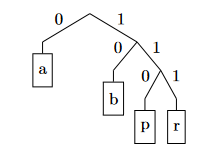


$a\longrightarrow 0$

$b\longrightarrow 10$

$p\longrightarrow 110$

$r\longrightarrow 111$

$barbapapa \longrightarrow 10 0 111 10 0 110 0 110 0$

# Optimisation du code

Lorsque le texte à encoder est connu, il est possible d’optimiser l’arbre binaire utilisé pour raccourcir les codes des lettres les plus fréquentes. C’est ce que fait l’algorithme de Huffman : il commence par compter dans le texte le nombre d’apparitions de chaque caractère. Par exemple, dans la phrase :
$$je~ veux~ et ~j'exige~ d'exquises~ excuses$$

nous avons :

|e|␣|s|x|u|i|j|'|c|d|g|q|t|v|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|9|5|4|4|3|2|2|2|1|1|1|1|1|1|

où « ␣ » est le caractère espace, et « ’ » est l’apostrophe.

À partir de ces fréquences, l’algorithme initialise un arbre par caractère, avec comme poids le nombre d’apparitions du caractère :

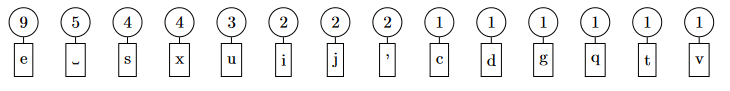



À chaque itération, l’algorithme sélectionne les deux arbres ayant les poids les plus faibles, et les assemble
pour former les deux enfants d’un arbre binaire dont le poids est la somme des deux arbres. Lorsque plusieurs
arbres sont à égalité pour le poids le plus faible, l’arbre sélectionné parmi eux peut être n’importe lequel. Ainsi,
à la première itération, nous pourrions obtenir :

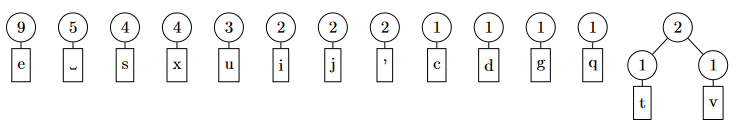

Et ainsi de suite:

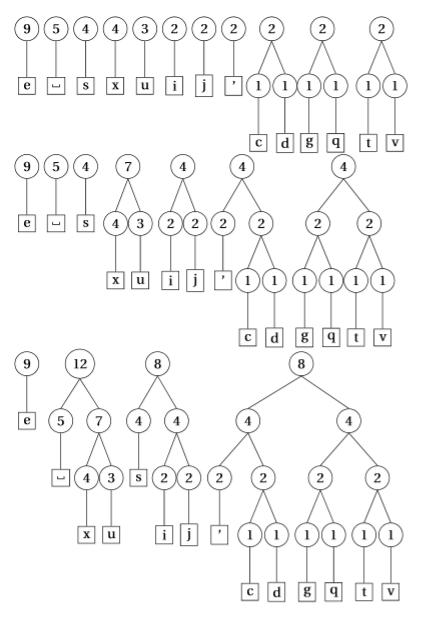

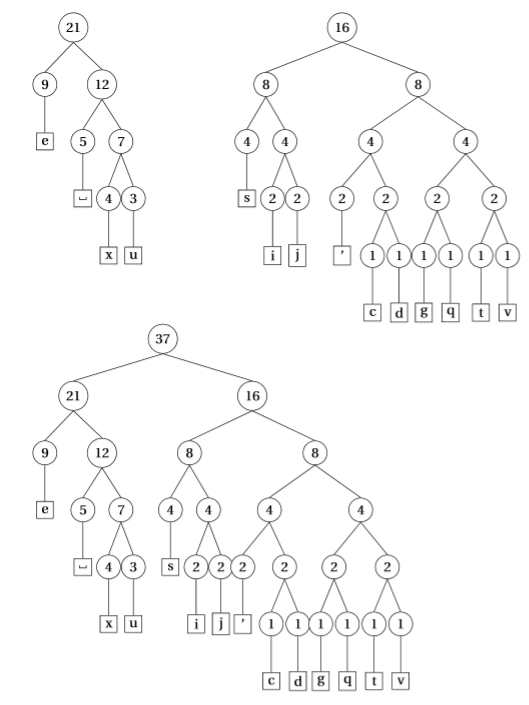

Lorsqu’il ne reste plus qu’un seul arbre, l’algorithme est terminé. Plus formellement, l’algorithme de Huffman
est ci-dessous.

On parle de file à priorités pour une liste contenant des éléments ordonnées suivant un certain critére.

``
Fonction Huffman → arbre
    données : l’alphabet et les fréquences de chaque lettre
    résultat : l’arbre binaire du codage de Huffman
    Algorithme
        créer une file à priorités
        pour chaque caractère c de l’alphabet faire
            créer un arbre a
            a.caractère ←c
            a.poids ← fréquence de c
            ajouter a à la file à priorités
        tant que la file à priorités contient plus d’un arbre faire
        créer un arbre a
        a.gauche ← l’arbre de poids le plus faible de la file à priorités (que l’on retire de la file)
        a.droite ← l’arbre de poids le plus faible de la file à priorités (que l’on retire de la file)
        a.poids ← a.gauche.poids + a.droite.poids
        ajouter a à la file à priorités
        retourner le seul arbre contenu dans la file à priorités
``

Il faut
   + Une classe `Noeud` qui permet de construire un arbre avec les attributs caractere, poids, arbre gauche et arbre droit. On fera aussi une méthode `estFeuille` qui renvoie `True` si le noeud est une feuille.
   + Une fonction qui renvoie un dictionnaire qui compte les occurences d'un texte.
   + Une fonction qui insere un arbre dans une file à priorités. On peut utiliser une liste.
   + Une fonction de Huffman qui crée l'arbre de Huffman à l'aide de l'algorithme précédent.
   + Une fonction récursive `codage(arbre,dico,binaire="")` qui renvoie un dictionnaire contenant le codage de chaque caractere des feuilles d'un arbre de Huffmann.
   + Et pour finir une fonction `compression(texte)` qui renvoie le codage de Huffman d'un texte et son taux de compression.
   